# Rank Features of a Smartphone - Build a Python Application to Classify and Rank Dataset

In [1]:
#Load required Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.offline as pyo
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Load csv file
df=pd.read_csv("mobile_test.csv")

In [3]:
#Converting to DataFrame
df = pd.DataFrame(df)
df.head(11)

id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0    1           1043     1          1.8         1  14       0           5   
1    2            841     1          0.5         1   4       1          61   
2    3           1807     1          2.8         0   1       0          27   
3    4           1546     0          0.5         1  18       1          25   
4    5           1434     0          1.4         0  11       1          49   
5    6           1464     1          2.9         1   5       1          50   
6    7           1718     0          2.4         0   1       0          47   
7    8            833     0          2.4         1   0       0          62   
8    9           1111     1          2.9         1   9       1          25   
9   10           1520     0          0.5         0   1       0          25   
10  11           1500     0          2.2         0   2       0          55   

    m_dep  mobile_wt  ...  pc  px_height  px_width   ram  sc_h  sc_w  \
0     0.1        193  ...  16        226      1412  3476    12     7   
1     0.8        191  ...  12        746       857  3895     6     0   
2     0.9        186  ...   4       1270      1366  2396    17    10   
3     0.5         96  ...  20        295      1752  3893    10     0   
4     0.5        108  ...  18        749       810  1773    15     8   
5     0.8        198  ...   9        569       939  3506    10     7   
6     1.0        156  ...   3       1283      1374  3873    14     2   
7     0.8        111  ...   2       1312      1880  1495     7     2   
8     0.6        101  ...  19        556       876  3485    11     9   
9     0.5        171  ...  20         52      1009   651     6     0   
10    0.6         80  ...   6        503      1336  3866    13     7   

    talk_time  three_g  touch_screen  wifi  
0           2        0             1     0  
1           7        1             0     0  
2          10        0             1     1  
3           7        1             1     0  
4           7        1             0     1  
5           3        1             1     1  
6          10        0             0     0  
7          18        0             1     1  
8          10        1             1     0  
9           5        1             0     1  
10         20        0             1     0  

[11 rows x 21 columns]

In [4]:
#data frame discription
df.describe()

id  battery_power         blue  clock_speed     dual_sim  \
count  1000.000000    1000.000000  1000.000000  1000.000000  1000.000000   
mean    500.500000    1248.510000     0.516000     1.540900     0.517000   
std     288.819436     432.458227     0.499994     0.829268     0.499961   
min       1.000000     500.000000     0.000000     0.500000     0.000000   
25%     250.750000     895.000000     0.000000     0.700000     0.000000   
50%     500.500000    1246.500000     1.000000     1.500000     1.000000   
75%     750.250000    1629.250000     1.000000     2.300000     1.000000   
max    1000.000000    1999.000000     1.000000     3.000000     1.000000   

                fc       four_g   int_memory        m_dep   mobile_wt  ...  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000  ...   
mean      4.593000     0.487000    33.652000     0.517500   139.51100  ...   
std       4.463325     0.500081    18.128694     0.280861    34.85155  ...   
min       0.000000     0.000000     2.000000     0.100000    80.00000  ...   
25%       1.000000     0.000000    18.000000     0.300000   109.75000  ...   
50%       3.000000     0.000000    34.500000     0.500000   139.00000  ...   
75%       7.000000     1.000000    49.000000     0.800000   170.00000  ...   
max      19.000000     1.000000    64.000000     1.000000   200.00000  ...   

                pc    px_height     px_width          ram         sc_h  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     10.054000   627.121000  1239.774000  2138.998000    11.995000   
std       6.095099   432.929699   439.670981  1088.092278     4.320607   
min       0.000000     0.000000   501.000000   263.000000     5.000000   
25%       5.000000   263.750000   831.750000  1237.250000     8.000000   
50%      10.000000   564.500000  1250.000000  2153.500000    12.000000   
75%      16.000000   903.000000  1637.750000  3065.500000    16.000000   
max      20.000000  1907.000000  1998.000000  3989.000000    19.000000   

              sc_w    talk_time      three_g  touch_screen         wifi  
count  1000.000000  1000.000000  1000.000000    1000.00000  1000.000000  
mean      5.316000    11.085000     0.756000       0.50000     0.507000  
std       4.240062     5.497636     0.429708       0.50025     0.500201  
min       0.000000     2.000000     0.000000       0.00000     0.000000  
25%       2.000000     6.750000     1.000000       0.00000     0.000000  
50%       5.000000    11.000000     1.000000       0.50000     1.000000  
75%       8.000000    16.000000     1.000000       1.00000     1.000000  
max      18.000000    20.000000     1.000000       1.00000     1.000000  

[8 rows x 21 columns]

In [5]:
#null check
df.isnull()

id  battery_power   blue  clock_speed  dual_sim     fc  four_g  \
0    False          False  False        False     False  False   False   
1    False          False  False        False     False  False   False   
2    False          False  False        False     False  False   False   
3    False          False  False        False     False  False   False   
4    False          False  False        False     False  False   False   
..     ...            ...    ...          ...       ...    ...     ...   
995  False          False  False        False     False  False   False   
996  False          False  False        False     False  False   False   
997  False          False  False        False     False  False   False   
998  False          False  False        False     False  False   False   
999  False          False  False        False     False  False   False   

     int_memory  m_dep  mobile_wt  ...     pc  px_height  px_width    ram  \
0         False  False      False  ...  False      False     False  False   
1         False  False      False  ...  False      False     False  False   
2         False  False      False  ...  False      False     False  False   
3         False  False      False  ...  False      False     False  False   
4         False  False      False  ...  False      False     False  False   
..          ...    ...        ...  ...    ...        ...       ...    ...   
995       False  False      False  ...  False      False     False  False   
996       False  False      False  ...  False      False     False  False   
997       False  False      False  ...  False      False     False  False   
998       False  False      False  ...  False      False     False  False   
999       False  False      False  ...  False      False     False  False   

      sc_h   sc_w  talk_time  three_g  touch_screen   wifi  
0    False  False      False    False         False  False  
1    False  False      False    False         False  False  
2    False  False      False    False         False  False  
3    False  False      False    False         False  False  
4    False  False      False    False         False  False  
..     ...    ...        ...      ...           ...    ...  
995  False  False      False    False         False  False  
996  False  False      False    False         False  False  
997  False  False      False    False         False  False  
998  False  False      False    False         False  False  
999  False  False      False    False         False  False  

[1000 rows x 21 columns]

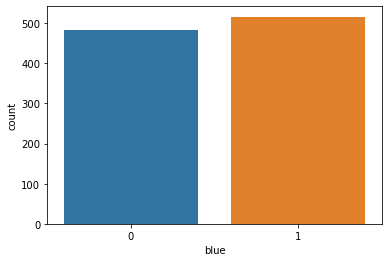

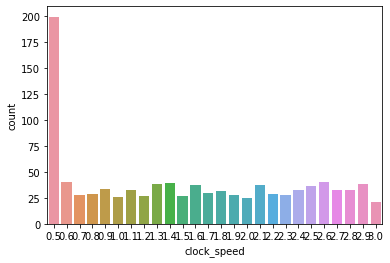

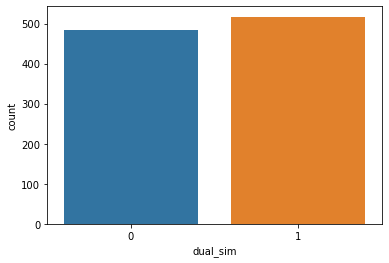

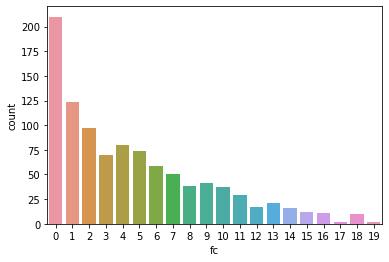

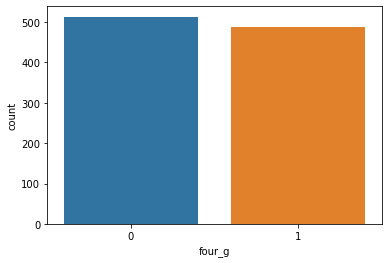

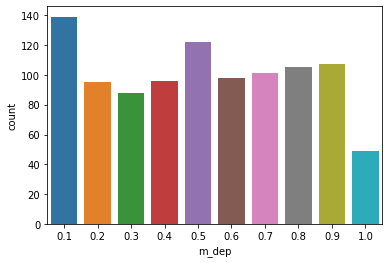

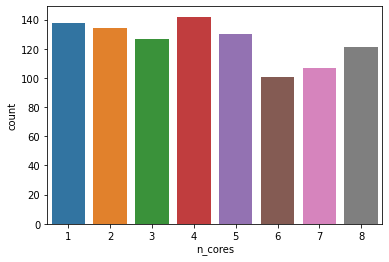

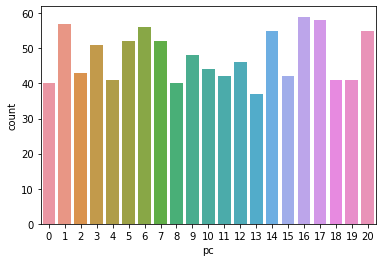

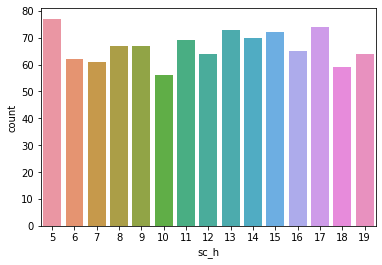

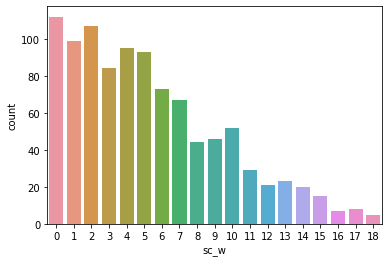

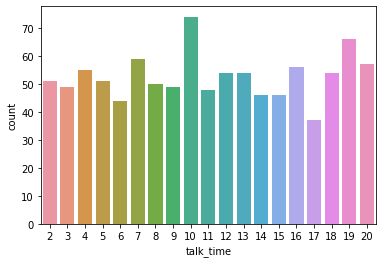

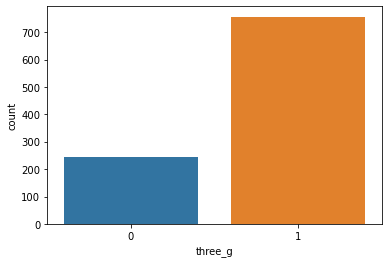

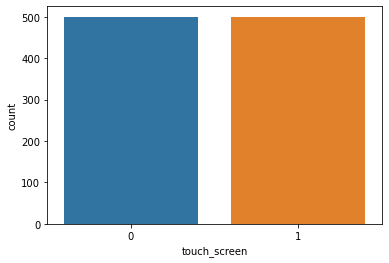

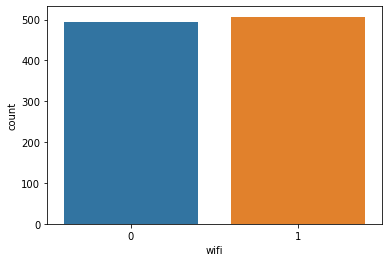

In [6]:
#CountPlot for various columns
for i in df:
    if(df[i].nunique()<30):
        sns.countplot(x=df[i])
        plt.show()

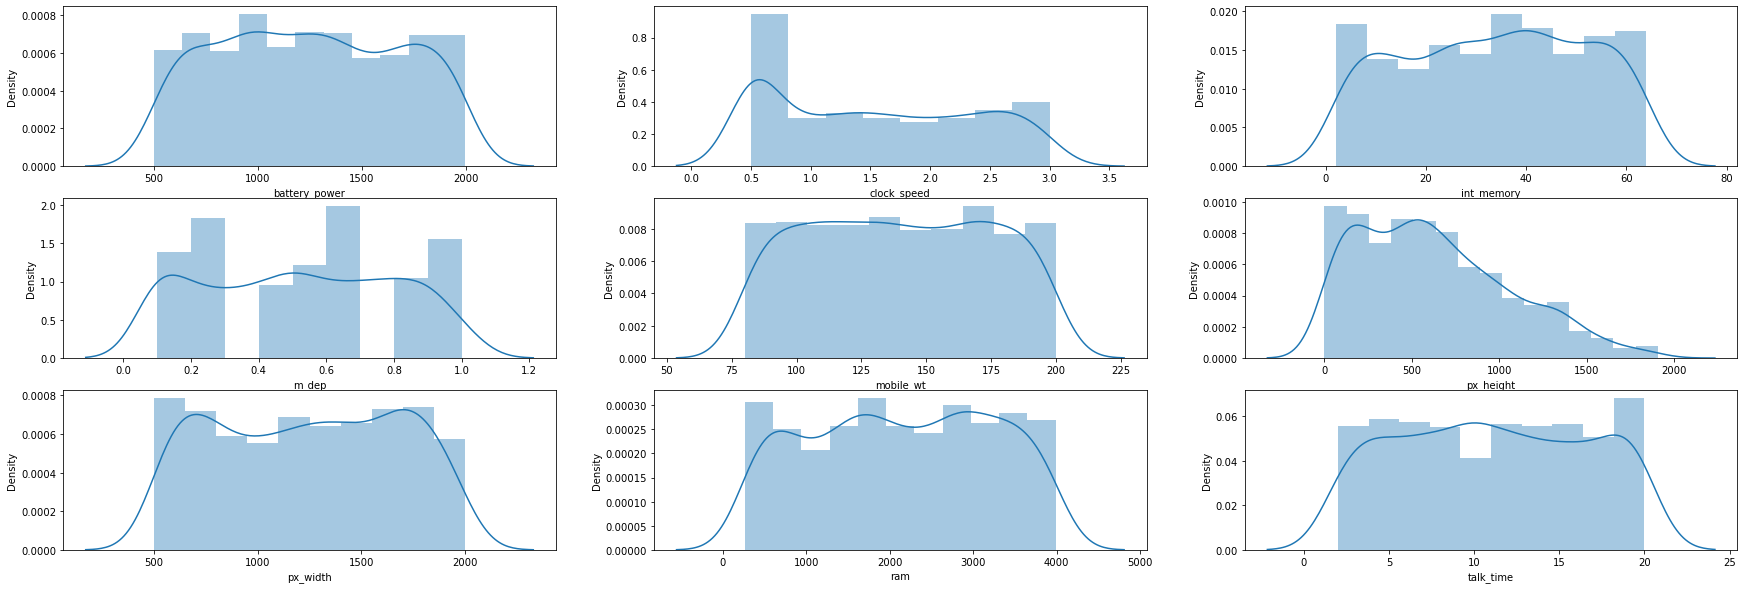

In [7]:
#Distplot for various columns
plt.figure(figsize = (30,10))
plt.subplot(331)
sns.distplot(df['battery_power'])
plt.subplot(332)
sns.distplot(df['clock_speed'])
plt.subplot(333)
sns.distplot(df['int_memory'])
plt.subplot(334)
sns.distplot(df['m_dep'])
plt.subplot(335)
sns.distplot(df['mobile_wt'])
plt.subplot(336)
sns.distplot(df['px_height'])
plt.subplot(337)
sns.distplot(df['px_width'])
plt.subplot(338)
sns.distplot(df['ram'])
plt.subplot(339)
sns.distplot(df['talk_time'])
plt.show()

In [8]:
#dual sim
df["is_DualSim"]=''
for i in range(len(df)):
    if df['dual_sim'][i]==0:
        df['is_DualSim'][i]='No'
    else:
        df['is_DualSim'][i]='Yes'
px.pie(data_frame = df, names = 'is_DualSim', title = 'Percentage of devices having dual sim', hole= 0.2)


In [9]:
#bluetooth devices
df["is_bluetooth"]=''
for i in range(len(df)):
    if df['blue'][i]==0:
        df['is_bluetooth'][i]='No'
    else:
        df['is_bluetooth'][i]='Yes'
px.pie(data_frame = df, names = 'is_bluetooth', title = 'Percentage of devices having bluetooth', hole= 0.2)


In [10]:
#4G
df["is_4G"]=''
for i in range(len(df)):
    if df['four_g'][i]==0:
        df['is_4G'][i]='No'
    else:
        df['is_4G'][i]='Yes'
px.pie(data_frame = df, names = 'is_4G', title = 'Percentage of devices having 4G connection', hole= 0.2)

In [11]:
#3G
df["is_3G"]=''
for i in range(len(df)):
    if df['three_g'][i]==0:
        df['is_3G'][i]='No'
    else:
        df['is_3G'][i]='Yes'
px.pie(data_frame = df, names = 'is_3G', title = 'Percentage of devices having 3G connection', hole= 0.2)


In [12]:
#Touch Screen
df["is_touchscreen"]=''
for i in range(len(df)):
    if df['touch_screen'][i]==0:
        df['is_touchscreen'][i]='No'
    else:
        df['is_touchscreen'][i]='Yes'
px.pie(data_frame = df, names = 'is_touchscreen', title = 'Percentage of devices having touch screen', hole= 0.2)


In [13]:
#Wifi
df["is_wifi"]=''
for i in range(len(df)):
    if df['wifi'][i]==0:
        df['is_wifi'][i]='No'
    else:
        df['is_wifi'][i]='Yes'
px.pie(data_frame = df, names = 'is_wifi', title = 'Percentage of devices having Wifi', hole= 0.2)


In [14]:
#Processors
df["cores"]=''
for i in range(len(df)):
    if df['n_cores'][i]==1:
        df['cores'][i]='single core'
    elif df['n_cores'][i]==2:
        df['cores'][i]='dual core'
    elif df['n_cores'][i]==3:
        df['cores'][i]='triple core'
    elif df['n_cores'][i]==4:
        df['cores'][i]='quad core'
    elif df['n_cores'][i]==5:
        df['cores'][i]='penta core'
    elif df['n_cores'][i]==6:
        df['cores'][i]='hexa core'
    elif df['n_cores'][i]==7:
        df['cores'][i]='hepta core'
    else:
        df['cores'][i]='octa core'
px.pie(data_frame = df, names = 'cores', title = 'Percentage of devices having different types of cores', hole= 0.2)